In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [18]:
df = pd.read_csv("../Omar_branch/test.csv")

In [19]:
df = df.drop("Unnamed: 0", axis = 1)

In [20]:
df = df.drop("beer_id", axis = 1)

In [21]:
df = df.drop("brewery_id", axis = 1)

In [22]:
df2 = df.copy()

In [23]:
df2.head()

,beer_name,beer_style,look,smell,taste,feel,overall,estimated_ibu,availability,abv,brewery_name,city,state,country,types
0,Hopper House Double IPA,American Imperial IPA,3.326923,3.346154,3.288462,3.307692,3.307692,83,Year-round,8.0,Spindletap Brewery,Houston,TX,US,"Brewery, Bar"
1,Juiceton,Other,4.330000,4.300000,4.330000,4.320000,4.310000,60,Rotating,8.5,Spindletap Brewery,Houston,TX,US,"Brewery, Bar"
2,Rauchtabout,Other,3.583333,3.500000,3.500000,3.416667,3.500000,35,Rotating,4.5,Spindletap Brewery,Houston,TX,US,"Brewery, Bar"
3,Hat Trick,Other,4.200000,4.200000,4.100000,4.150000,4.200000,60,Rotating,7.0,Spindletap Brewery,Houston,TX,US,"Brewery, Bar"
4,Tiny Gypsies,Other,4.500000,4.535714,4.571429,4.464286,4.571429,60,Rotating,6.5,Spindletap Brewery,Houston,TX,US,"Brewery, Bar"


In [24]:
df_name = df2.beer_name
#df_eng_name = df2["English name"]
df_style = df2["beer_style"]
df2.drop(["beer_name", "beer_style"], axis=1, inplace=True)
df2 = pd.get_dummies(df2)

In [25]:
df2.head()

,look,smell,taste,feel,overall,estimated_ibu,abv,availability_Fall,availability_Rotating,availability_Spring,...,state_TX,country_US,types_Brewery,"types_Brewery, Bar","types_Brewery, Bar, Beer-to-go","types_Brewery, Bar, Eatery","types_Brewery, Bar, Eatery, Beer-to-go","types_Brewery, Bar, Homebrew, Beer-to-go","types_Brewery, Eatery","types_Brewery, Eatery, Beer-to-go"
0,3.326923,3.346154,3.288462,3.307692,3.307692,83,8.0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
1,4.330000,4.300000,4.330000,4.320000,4.310000,60,8.5,0,1,0,...,1,1,0,1,0,0,0,0,0,0
2,3.583333,3.500000,3.500000,3.416667,3.500000,35,4.5,0,1,0,...,1,1,0,1,0,0,0,0,0,0
3,4.200000,4.200000,4.100000,4.150000,4.200000,60,7.0,0,1,0,...,1,1,0,1,0,0,0,0,0,0
4,4.500000,4.535714,4.571429,4.464286,4.571429,60,6.5,0,1,0,...,1,1,0,1,0,0,0,0,0,0


In [26]:
df3 = df2.copy()
df3["beer_name"] = df_name
df3["style"] = df_style

In [27]:
df3.head()

,look,smell,taste,feel,overall,estimated_ibu,abv,availability_Fall,availability_Rotating,availability_Spring,...,types_Brewery,"types_Brewery, Bar","types_Brewery, Bar, Beer-to-go","types_Brewery, Bar, Eatery","types_Brewery, Bar, Eatery, Beer-to-go","types_Brewery, Bar, Homebrew, Beer-to-go","types_Brewery, Eatery","types_Brewery, Eatery, Beer-to-go",beer_name,style
0,3.326923,3.346154,3.288462,3.307692,3.307692,83,8.0,0,0,0,...,0,1,0,0,0,0,0,0,Hopper House Double IPA,American Imperial IPA
1,4.330000,4.300000,4.330000,4.320000,4.310000,60,8.5,0,1,0,...,0,1,0,0,0,0,0,0,Juiceton,Other
2,3.583333,3.500000,3.500000,3.416667,3.500000,35,4.5,0,1,0,...,0,1,0,0,0,0,0,0,Rauchtabout,Other
3,4.200000,4.200000,4.100000,4.150000,4.200000,60,7.0,0,1,0,...,0,1,0,0,0,0,0,0,Hat Trick,Other
4,4.500000,4.535714,4.571429,4.464286,4.571429,60,6.5,0,1,0,...,0,1,0,0,0,0,0,0,Tiny Gypsies,Other


In [28]:
first_column = df3.pop('beer_name')
df3.insert(0, 'beer_name', first_column)

second_column = df3.pop('style')
df3.insert(3, 'style', second_column)

2428 unique beers

In [29]:
# Output File (CSV)
output_data_file = "beer_rec2.csv"

In [30]:
# Export to CSV
df3.to_csv(output_data_file,index=False)

In [31]:
# to find beer if user knows the beer name
def get_recommended(df, beer_name, n_neighbors=10):
    df_sub = df.drop(["beer_name", "style"], axis=1)
    model_knn = NearestNeighbors(metric='cosine', n_neighbors=n_neighbors)
    model_knn.fit(df_sub)
    beer = df.loc[df["beer_name"] == beer_name]
    beer = beer.drop(["beer_name", "style"], axis=1)
    beer = beer.to_numpy()
    distances, indices = model_knn.kneighbors(beer, n_neighbors = n_neighbors)
    result = df.iloc[indices.flatten()]
    result["Distance"] = distances.flatten()
    return result

In [32]:
# Run this cell to get recommended anime
df_result = get_recommended(df3, "Smash And Grab") # df3 is the reference table so no need to change; change second value

C:\Users\Gage\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\Gage\AppData\Local\Temp\ipykernel_27972\4055398202.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Distance"] = distances.flatten()


In [33]:
df_result.head(20)

,beer_name,look,smell,style,taste,feel,overall,estimated_ibu,abv,availability_Fall,...,country_US,types_Brewery,"types_Brewery, Bar","types_Brewery, Bar, Beer-to-go","types_Brewery, Bar, Eatery","types_Brewery, Bar, Eatery, Beer-to-go","types_Brewery, Bar, Homebrew, Beer-to-go","types_Brewery, Eatery","types_Brewery, Eatery, Beer-to-go",Distance
1888,Smash And Grab,3.690000,3.650000,American IPA,3.620000,3.600000,3.650000,60,6.2,0,...,1,0,0,1,0,0,0,0,0,1.110223e-16
1895,Presumed Innocent,3.463235,3.169118,American IPA,3.110294,3.220588,3.169118,60,7.2,0,...,1,0,0,1,0,0,0,0,0,5.279302e-04
933,Vanilla Coconut FroYo IPA,3.714286,3.750000,American IPA,3.714286,3.678571,3.678571,60,6.1,0,...,1,0,0,1,0,0,0,0,0,5.437889e-04
942,Humble Galaxy,3.650000,3.600000,American IPA,3.700000,3.650000,3.600000,60,6.5,0,...,1,0,0,1,0,0,0,0,0,5.527824e-04
1088,Excelsior!,3.725000,3.775000,American IPA,3.775000,3.800000,3.750000,60,6.5,0,...,1,0,0,1,0,0,0,0,0,5.620766e-04
2129,Cloud City,3.416667,3.416667,American IPA,3.416667,3.500000,3.333333,60,6.3,0,...,1,0,0,1,0,0,0,0,0,5.782673e-04
97,Brettshake IPA,3.925000,3.800000,American IPA,3.825000,3.850000,3.875000,60,6.5,0,...,1,0,0,1,0,0,0,0,0,5.802939e-04
881,Gully Cat,3.875000,3.916667,American IPA,3.916667,3.833333,3.875000,60,6.6,0,...,1,0,0,1,0,0,0,0,0,5.977710e-04
2310,Lovely Day IPA,3.535714,3.464286,American IPA,3.410714,3.375000,3.375000,60,6.7,0,...,1,0,0,1,0,0,0,0,0,6.034956e-04
648,Gaze,4.000000,3.950000,American IPA,3.950000,3.950000,3.950000,60,6.2,0,...,1,0,0,1,0,0,0,0,0,6.050465e-04


In [34]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1888 to 648
Columns: 314 entries, beer_name to Distance
dtypes: float64(7), int64(1), object(2), uint8(304)
memory usage: 3.8+ KB


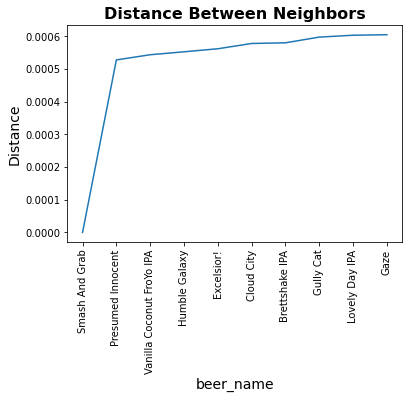

In [35]:
# plt.figure(figsize=(8,6))
# fig = plt.figure()
plt.plot(df_result["beer_name"], df_result["Distance"])
plt.title("Distance Between Neighbors", fontsize=16, fontweight="bold")
plt.xlabel("beer_name", fontsize=14)
plt.xticks(rotation = 90)
plt.ylabel("Distance", fontsize=14)
# plt.show()
plt.savefig('graph01.png', bbox_inches = "tight")

In [36]:
# to find anime if user knows nothing about anime and wants to use genre and review score
def get_recommended_genre(df, style, abv=0, n_neighbors=10):
    
    # explain metric hyper-parm in writeup
    df_sub = df.drop(["beer_name", "style", "abv"], axis=1)
    model_knn = NearestNeighbors(metric='cosine', n_neighbors=n_neighbors)
    model_knn.fit(df_sub)
    
    anime = df.loc[(df["style"] == style) & (df.abv > abv)].sample(1)
    anime = anime.drop(["beer_name", "style", "abv"], axis=1)
    anime = anime.to_numpy()
    
    distances, indices = model_knn.kneighbors(anime, n_neighbors = n_neighbors)
    
    result = df.iloc[indices.flatten()]
    result["Distance"] = distances.flatten()
#     result = result[["Name", "English name", "Score", "Genres"]]
    
    return result

In [37]:
# Run this cell to get recommended anime
df_result2 = get_recommended_genre(df3, "American IPA", 6.5) # df3 is the reference table so no need to change; change second and third values

C:\Users\Gage\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\Gage\AppData\Local\Temp\ipykernel_27972\3735994038.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Distance"] = distances.flatten()


In [38]:
df_result2.head()

,beer_name,look,smell,style,taste,feel,overall,estimated_ibu,abv,availability_Fall,...,country_US,types_Brewery,"types_Brewery, Bar","types_Brewery, Bar, Beer-to-go","types_Brewery, Bar, Eatery","types_Brewery, Bar, Eatery, Beer-to-go","types_Brewery, Bar, Homebrew, Beer-to-go","types_Brewery, Eatery","types_Brewery, Eatery, Beer-to-go",Distance
950,Bigger in Texas,3.562500,3.9375,American IPA,3.875000,3.9375,3.8750,60,8.10,0,...,1,0,0,1,0,0,0,0,0,1.110223e-16
940,Haze Race,3.625000,3.5625,American IPA,3.625000,3.4375,3.5625,60,6.00,0,...,1,0,0,1,0,0,0,0,0,7.450326e-05
949,Especia Oscura,4.100000,4.0000,American Imperial Stout,4.200000,4.1000,4.1000,65,10.20,0,...,1,0,0,1,0,0,0,0,0,2.748670e-04
936,North East Houston IPA,3.666667,3.7500,American IPA,3.666667,3.7500,3.7500,60,8.30,0,...,1,0,0,1,0,0,0,0,0,2.907920e-04
946,Obvious Equation,3.950000,4.0000,American IPA,3.900000,3.8500,3.9000,60,7.95,0,...,1,0,0,1,0,0,0,0,0,2.936894e-04


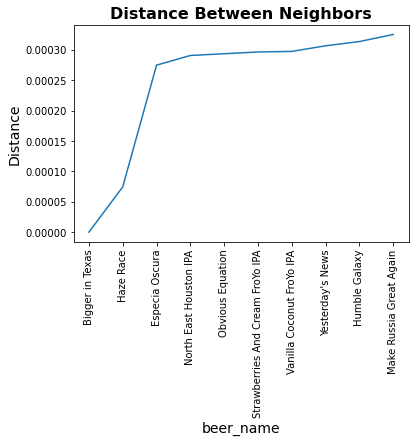

In [39]:
# plt.figure(figsize=(10,6))
plt.plot(df_result2["beer_name"], df_result2["Distance"])
plt.title("Distance Between Neighbors", fontsize=16, fontweight="bold")
plt.xlabel("beer_name", fontsize=14)
plt.xticks(rotation = 90)
plt.ylabel("Distance", fontsize=14)
plt.show()